# Smart Home AI Project

## Classification of Clean and Messy Rooms

최근 IoT 기술과 인공지능 기술의 발전으로 우리의 생활이 하루하루 달라지고 있음을 실감하고 있을 것이다. 보다 차원 높은 지능형 정보 처리와 정보 추출로 인하여 실내외 환경에 큰 영향을 미치게 될 것이다. 특별히 IoT 와 인공지능이 결합하여 구축해 나가고 있는 스마트 홈은 그 중요한 적용 대상이라고 할 수 있다. 이제는 사람이 스스로 제어하지 않아도, 방대한 데이터를 기준으로 사람이 하던 일을 판단하고 처리하여 대신하여 주게 된다. 청소와 세탁을 비롯하여 온도, 조도, 습도 제어 등 다양한 자동화 기법들이 나오고 있다. 온도와 습도 제어 등은 각각의 온도 센서, 근접 센서 등을 활용하여 사람의 감각을 대신하여 주고 있다. 하지만 이미지 인식을 통하여 처리하고 제공해줄 수 있는 아이템을 고민하던 중, 로봇청소기를 연상하며 해당 주제를 선정하게 되었다.
해당 프로젝트는, 실내 공간을 카메라로 인식하여 깨끗하거나 더러운 여부를 판단하여 알려주는 분류기를 제안한다. 이는 청소 알림을 제공하거나, 직접 실내 정리 정돈까지 해주는 기기까지 발전 가능성이 있다고 시사한다. 또한, 생활가전 사업부 UX혁신 팀에서 스마트 홈의 현재와 미래를 매일 밀접하게 보고 있는 디자이너로서, 해당 분류 기를 직접 설계해 볼 수 있는 것은 큰 자극제가 될 것이다.  

### 0. Imports

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2 
import os 
from random import shuffle 
from tqdm import tqdm 
from PIL import Image
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.image as implt
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import warnings
warnings.filterwarnings('ignore')
import os

Duplicate key in file '/Users/yeeerin/.matplotlib/matplotlibrc', line 2 ('backend: TkAgg')
Duplicate key in file '/Users/yeeerin/.matplotlib/matplotlibrc', line 3 ('backend: TkAgg')
Duplicate key in file '/Users/yeeerin/.matplotlib/matplotlibrc', line 4 ('backend: TkAgg')
Duplicate key in file '/Users/yeeerin/.matplotlib/matplotlibrc', line 5 ('backend: TkAgg')


### 1.0 Data path

In [2]:
BASE_PATH = "/Users/yeeerin/Documents/HY/'21_G4/01_AI/messy-room-classifier-master/data/images"
train_data = BASE_PATH + "/train"
test_data = BASE_PATH + "/test"

train_messy_path = BASE_PATH + "/train/messy"
train_clean_path = BASE_PATH + "/train/clean"

test_messy_path = BASE_PATH + "/test/messy"
test_clean_path = BASE_PATH + "/test/clean"

### 1.1 Vizualizing the data

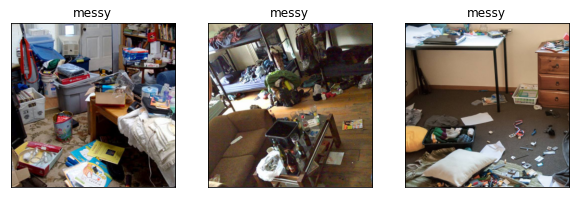

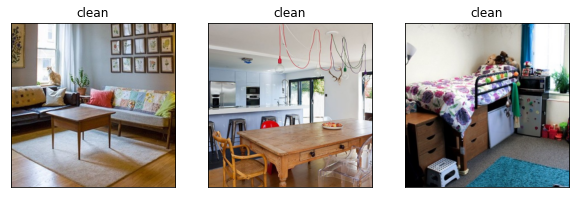

In [3]:
plt.figure(figsize=(10,10))
for i in range(3):
    messy_img = implt.imread(train_messy_path + "/"+str(i)+".png") #messy
    plt.subplot(1,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title('messy')
    plt.imshow(messy_img)
plt.show()

plt.figure(figsize=(10,10))
for i in range(3):
    clean_img = implt.imread(train_clean_path + "/"+str(i)+".png") #clean
    plt.subplot(1,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title('clean')
    plt.imshow(clean_img, cmap = plt.cm.gray)
plt.show()

### 1.2.1 Train Images load

In [4]:
img_size = 224
messy_train = []
clean_train = []
label_train = []

for i in os.listdir(train_plastic_path): # all train plastic images
    if os.path.isfile(train_data + "/messy/" + i): # check image in file
        messy = Image.open(train_data + "/messy/" + i) 
        messy = messy.resize((img_size,img_size), Image.ANTIALIAS) # resizing to 224,224
        messy = np.asarray(plastic)/255 # bit format
        messy_train.append(plastic)
        label_train.append(1)
        
for i in os.listdir(train_glass_path): # all train glass images
    if os.path.isfile(train_data + "/clean/" + i): # check image in file
        clean = Image.open(train_data + "/clean/" + i)
        clean = clean.resize((img_size,img_size), Image.ANTIALIAS) # resizing to 224,224
        clean = np.asarray(clean)/255 # bit format
        clean_train.append(clean)
        label_train.append(0)

In [5]:
x_train = np.concatenate((messy_train,clean_train),axis=0)
print("messy:",np.shape(messy_train) , "clean:",np.shape(clean_train))
x_train = x_train.reshape(-1,img_size,img_size,3)
x_train_label = np.asarray(label_train)
x_train_label = x_train_label.reshape(x_train_label.shape[0],1)

print("train_dataset:",np.shape(x_train), "train_values:",np.shape(x_train_label))

messy: (96, 224, 224, 3) clean: (96, 224, 224, 3)
train_dataset: (192, 224, 224, 3) train_values: (192, 1)


### 1.2.2 Test Images load

In [6]:
messy_test = []
clean_test = []
label = []

for i in os.listdir(test_messy_path): # all train messy images
    if os.path.isfile(test_data + "/messy/" + i): # check image in file
        messy = Image.open(test_data + "/messy/" + i)
        messy = messy.resize((img_size,img_size), Image.ANTIALIAS) # resizing to 224,22,4
        messy = np.asarray(messy)/255 # bit format
        messy_test.append(messy)
        label.append(1)
        
for i in os.listdir(test_clean_path): # all train clean images
    if os.path.isfile(test_data + "/clean/" + i): # check image in file
        clean = Image.open(test_data + "/clean/" + i)  #.convert("L") 
        clean = clean.resize((img_size,img_size), Image.ANTIALIAS) # resizing to 50,50
        clean = np.asarray(clean)/255 # bit format
        clean_test.append(clean)
        label.append(0)

In [7]:
x_test = np.concatenate((messy_test,clean_test),axis=0)
print("messy:",np.shape(messy_test) , "clean:",np.shape(clean_test))
x_test = x_test.reshape(-1,img_size,img_size,3)
x_test_label = np.asarray(label)
x_test_label = x_test_label.reshape(x_test_label.shape[0],1)
print("train_dataset:",np.shape(x_test), "train_values:",np.shape(x_test_label))


messy: (10, 224, 224, 3) clean: (10, 224, 224, 3)
train_dataset: (20, 224, 224, 3) train_values: (20, 1)


### 1.2.3 Concatenate Train image + Test image

In [8]:
x = np.concatenate((x_train,x_test),axis=0) #train data
# x.shape: 
y = np.concatenate((x_train_label,x_test_label),axis=0)
#x = x.reshape(x.shape[0],x.shape[1]*x.shape[2]) # flatten 3D image array to 2D, count
print("images:",np.shape(x), "labels:",np.shape(y))

images: (212, 224, 224, 3) labels: (212, 1)


### 1.2.4 Spliting Concatenated dataset

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

print("Train Number: ", number_of_train)
print("Test Number: ", number_of_test)

Train Number:  180
Test Number:  32


In [10]:
x_train = X_train
x_test = X_test
y_train = y_train
y_test = y_test
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (180, 224, 224, 3)
x test:  (32, 224, 224, 3)
y train:  (180, 1)
y test:  (32, 1)


## 2. 1차 Machine Learing

### 2.1 1차 CNN Model (꽃 분류기 과제 모델)

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [12]:
num_classes = 2

#모델 구성하기
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_size, img_size, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [13]:
#모델 컴파일
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0

In [15]:
#모델 학습
epochs=20
history = model.fit(
  x_train, y_train,
  batch_size =20, 
  epochs=epochs, validation_split = 0.1
)


Epoch 1/20
9/9 [==============================] - 4s 423ms/step - loss: 0.6980 - accuracy: 0.4938 - val_loss: 0.7099 - val_accuracy: 0.3333
Epoch 2/20
9/9 [==============================] - 4s 369ms/step - loss: 0.6916 - accuracy: 0.5309 - val_loss: 0.6940 - val_accuracy: 0.3333
Epoch 3/20
9/9 [==============================] - 3s 350ms/step - loss: 0.6931 - accuracy: 0.4938 - val_loss: 0.6930 - val_accuracy: 0.6667
Epoch 4/20
9/9 [==============================] - 3s 360ms/step - loss: 0.6930 - accuracy: 0.5309 - val_loss: 0.6941 - val_accuracy: 0.3333
Epoch 5/20
9/9 [==============================] - 3s 360ms/step - loss: 0.6930 - accuracy: 0.5309 - val_loss: 0.6956 - val_accuracy: 0.3333
Epoch 6/20
9/9 [==============================] - 3s 368ms/step - loss: 0.6927 - accuracy: 0.5309 - val_loss: 0.6968 - val_accuracy: 0.3333
Epoch 7/20
9/9 [==============================] - 3s 364ms/step - loss: 0.6926 - accuracy: 0.5309 - val_loss: 0.6979 - val_accuracy: 0.3333
Epoch 8/20
9/9 [====

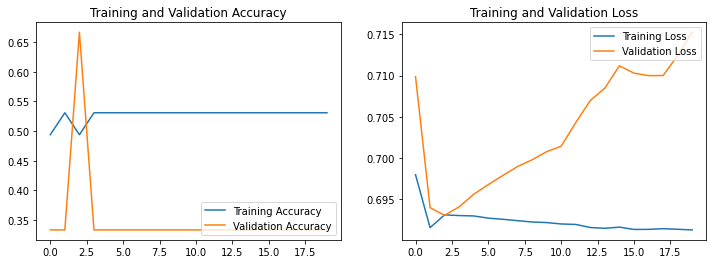

In [16]:
#모델 학습 과정 정확도/loss 추이

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right') #middle right
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### 2.2 2차 CNN Model (1차 모델을 기준으로 데이터 증강하여)

#### 2.2.1 데이터 증강

In [17]:
def load_img(path):
    image = cv2.resize(path, (224, 224))
    return image[...,::-1]

def prepare(image):
    IMG_SIZE = 224
    new_array = cv2.resize(image, (img_size, img_size)) 
    return new_array.reshape(-1, img_size,img_size,3)

In [18]:
data_augmentation = tf.keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", 
                                                 input_shape=(img_size, 
                                                              img_size,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

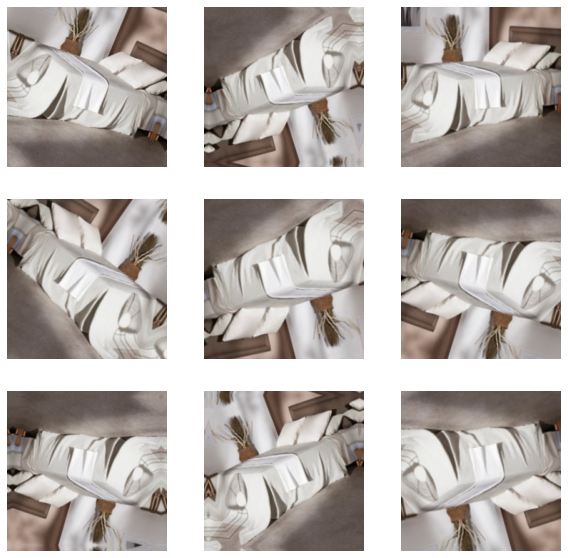

In [19]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(prepare(x_train[0]))
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

#### 2.2.2 증강된 데이터로 재학습

In [20]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_size, img_size, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [21]:
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 224, 224, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 64)       

In [23]:
epochs=20
history = model.fit(
  x_train, y_train,
  batch_size =20, 
  epochs=epochs, validation_split = 0.1
)

Epoch 1/20
9/9 [==============================] - 6s 557ms/step - loss: 0.6961 - accuracy: 0.5309 - val_loss: 0.6982 - val_accuracy: 0.3333
Epoch 2/20
9/9 [==============================] - 4s 447ms/step - loss: 0.6925 - accuracy: 0.5309 - val_loss: 0.7093 - val_accuracy: 0.3333
Epoch 3/20
9/9 [==============================] - 4s 478ms/step - loss: 0.6923 - accuracy: 0.5309 - val_loss: 0.7221 - val_accuracy: 0.3333
Epoch 4/20
9/9 [==============================] - 6s 618ms/step - loss: 0.6921 - accuracy: 0.5309 - val_loss: 0.7064 - val_accuracy: 0.3333
Epoch 5/20
9/9 [==============================] - 4s 496ms/step - loss: 0.6920 - accuracy: 0.5309 - val_loss: 0.7070 - val_accuracy: 0.3333
Epoch 6/20
9/9 [==============================] - 5s 608ms/step - loss: 0.6921 - accuracy: 0.5309 - val_loss: 0.6978 - val_accuracy: 0.3333
Epoch 7/20
9/9 [==============================] - 4s 445ms/step - loss: 0.6928 - accuracy: 0.5309 - val_loss: 0.6949 - val_accuracy: 0.3333
Epoch 8/20
9/9 [====

In [69]:
predictions = model.predict(x_test)
# predictions

In [70]:
rounded_predictions = model.predict_classes(x = x_test, batch_size=10, verbose=0)
for i in rounded_predictions[:20]:
    print(i)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


## 3. 3차 Machine Learing

### 3.1 VGG16을 활용하여 정확도 높히기

In [3]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from sklearn.metrics import confusion_matrix
import itertools
import os
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

Duplicate key in file '/Users/yeeerin/.matplotlib/matplotlibrc', line 2 ('backend: TkAgg')
Duplicate key in file '/Users/yeeerin/.matplotlib/matplotlibrc', line 3 ('backend: TkAgg')
Duplicate key in file '/Users/yeeerin/.matplotlib/matplotlibrc', line 4 ('backend: TkAgg')
Duplicate key in file '/Users/yeeerin/.matplotlib/matplotlibrc', line 5 ('backend: TkAgg')


[VGG16]
VGG16 was publised in 2014 and is one of the simplest (among the other cnn architectures used in Imagenet competition). It's Key Characteristics are:

This network contains total 16 layers in which weights and bias parameters are learnt.
A total of 13 convolutional layers are stacked one after the other and 3 dense layers for classification.
The number of filters in the convolution layers follow an increasing pattern (similar to decoder architecture of autoencoder).
The informative features are obtained by max pooling layers applied at different steps in the architecture.
The dense layers comprises of 4096, 4096, and 1000 nodes each.
The cons of this architecture are that it is slow to train and produces the model with very large size.
The VGG16 architecture is given below:
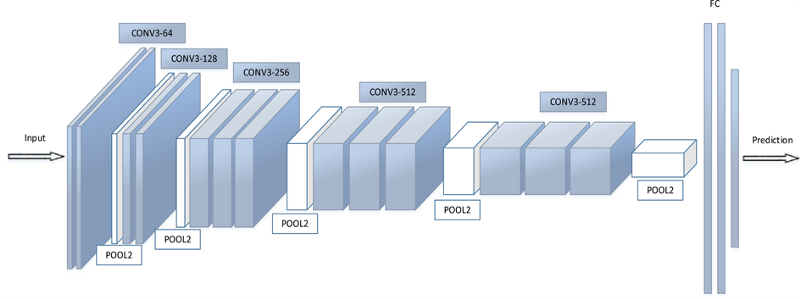

### 3.1.1 VGG16 model (Functional)

In [76]:
from keras.layers import Input, Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Model

_input = Input((224,224,3)) 

conv1  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(_input)
conv2  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(conv1)
pool1  = MaxPooling2D((2, 2))(conv2)

conv3  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(pool1)
conv4  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(conv3)
pool2  = MaxPooling2D((2, 2))(conv4)

conv5  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(pool2)
conv6  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv5)
conv7  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv6)
pool3  = MaxPooling2D((2, 2))(conv7)

conv8  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool3)
conv9  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv8)
conv10 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv9)
pool4  = MaxPooling2D((2, 2))(conv10)

conv11 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool4)
conv12 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv11)
conv13 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv12)
pool5  = MaxPooling2D((2, 2))(conv13)

flat   = Flatten()(pool5)
dense1 = Dense(4096, activation="relu")(flat)
dense2 = Dense(4096, activation="relu")(dense1)
output = Dense(1000, activation="softmax")(dense2)

vgg16_model  = Model(inputs=_input, outputs=output)

### 3.1.2 VGG16 model (Sequential)

In [77]:
vgg16_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 56, 56, 128)       0   

In [78]:
vgg16_model = keras.applications.vgg16.VGG16()

In [79]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [80]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 224, 224, 3)       0         
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 224, 224, 64)      1792      
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 224, 224, 64)      36928     
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 112, 112, 64)      0         
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 112, 112, 128)     73856     
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 112, 112, 128)     147584    
_________________________________________________________________
module_wrapper_6 (ModuleWrap (None, 56, 56, 128)       0

In [5]:
from keras.models import Sequential

vgg16_model = Sequential()
for layer in vgg16_model.layers[:-1]:
    vgg16_model.add(layer)

In [6]:
for layer in vgg16_model.layers:
    layer.trainable = False

In [7]:
vgg16_model.add(Dense(2, activation='softmax'))

In [86]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(x_train,y_train,
                 batch_size=20,
                 epochs = 10,
                 validation_split=0.1)

Epoch 1/10
9/9 [==============================] - 53s 6s/step - loss: 0.4381 - accuracy: 0.8034 - val_loss: 0.4366 - val_accuracy: 0.8333
Epoch 2/10
9/9 [==============================] - 48s 5s/step - loss: 0.2563 - accuracy: 0.8778 - val_loss: 0.3711 - val_accuracy: 0.8333
Epoch 3/10
9/9 [==============================] - 43s 5s/step - loss: 0.2156 - accuracy: 0.9127 - val_loss: 0.2781 - val_accuracy: 0.8889
Epoch 4/10
9/9 [==============================] - 74s 9s/step - loss: 0.2196 - accuracy: 0.9199 - val_loss: 0.2665 - val_accuracy: 0.8889
Epoch 5/10
9/9 [==============================] - 67s 8s/step - loss: 0.1960 - accuracy: 0.9393 - val_loss: 0.2602 - val_accuracy: 0.9444
Epoch 6/10
9/9 [==============================] - 54s 6s/step - loss: 0.1990 - accuracy: 0.9490 - val_loss: 0.2624 - val_accuracy: 0.9444
Epoch 7/10
9/9 [==============================] - 55s 6s/step - loss: 0.2057 - accuracy: 0.9251 - val_loss: 0.3600 - val_accuracy: 0.8333
Epoch 8/10
9/9 [==================

### 3.1.3 모델 학습 과정 정확도/loss 추이

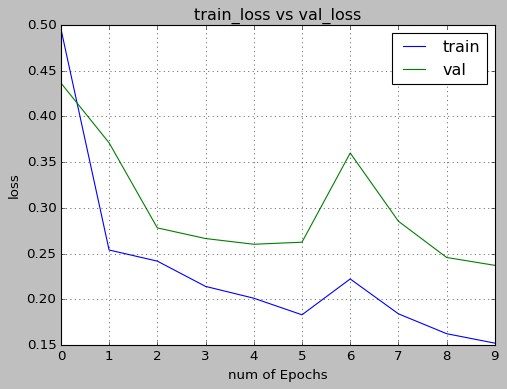

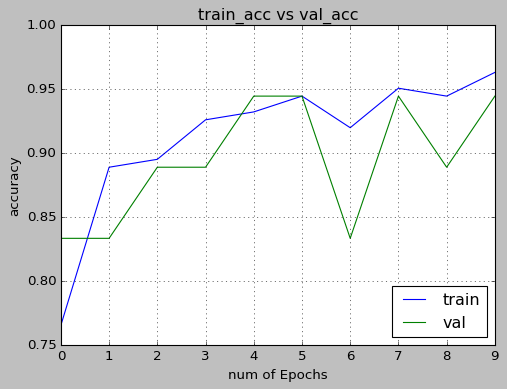

In [114]:
epochs = 10
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
xc = range(epochs)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [118]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

1/1 [==============================] - 9s 9s/step - loss: 0.1641 - accuracy: 0.9688
0.16408555209636688
0.96875


### 3.1.4 Confusion Matrix

In [119]:
predictions = model.predict(x_test)
# predictions

In [120]:
rounded_prediction = model.predict_classes(x = x_test, batch_size=10, verbose=0)
for i in rounded_predictions[:10]:
    print(i)

0
0
0
0
0
0
0
0
0
0


In [121]:
print(y_test[1:10])
print(np.unique(y_test, return_counts = True))

[[0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]]
(array([0, 1]), array([18, 14]))


In [122]:
rounded_prediction = np.array(rounded_prediction)
print(np.unique(rounded_prediction, return_counts = True))

(array([0, 1]), array([19, 13]))


Confusion matrix, without normalization
[[18  0]
 [ 1 13]]


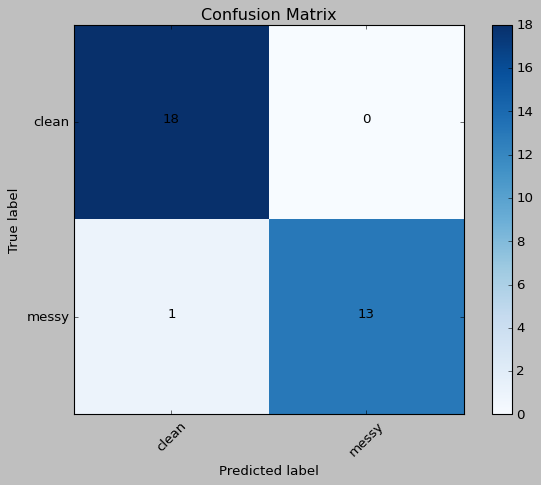

In [124]:
cm = confusion_matrix(y_test,rounded_prediction)

cm_plot_labels = ['clean', 'messy']
plot_confusion_matrix(cm=cm,
                      classes=cm_plot_labels,
                      title='Confusion Matrix')

Explanation of Matrix:

(True Positive)
Correct Messy Room Predictions: 18

(False Positive)
Incorrect Messy Room Predictions: 0

(True Negative)
Correct Clean Room Predictions: 1

(False Negative)
Incorrect Clean Room Predictions: 13

### 4. 실험 결과

In [125]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_test,
                               rounded_prediction,
                               target_names=['0','1'])

print(report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.93      0.96        14

    accuracy                           0.97        32
   macro avg       0.97      0.96      0.97        32
weighted avg       0.97      0.97      0.97        32



Probabilities:  [[0.00525608 0.99474394]]
Actual:  Messy Room
Prediction:  Messy Room


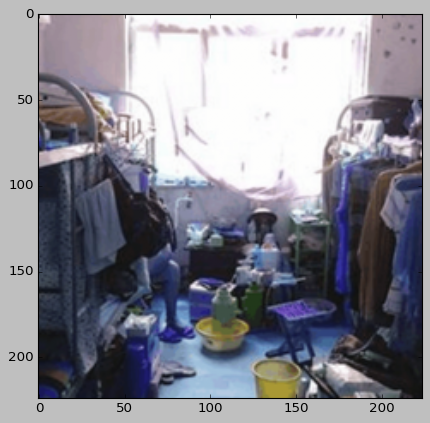

In [126]:
n = 3

prediction = model.predict(prepare(x_test[n]))
print("Probabilities: ",prediction)
x = ["Messy Room" if y_test[n]== 1 else "Clean Room"]
print("Actual: ",x[0])
rounded_prediction = model.predict_classes(x = prepare(x_test[n]), batch_size=10, verbose=0)
y = ["Messy Room" if rounded_prediction[0]== 1 else "Clean Room"]
print("Prediction: ", y[0])
plt.imshow(load_img(X_test[n]), cmap='gray')
plt.show()

Probabilities:  [[0.9168672  0.08313281]]
Actual:  Clean Room
Prediction:  Clean Room


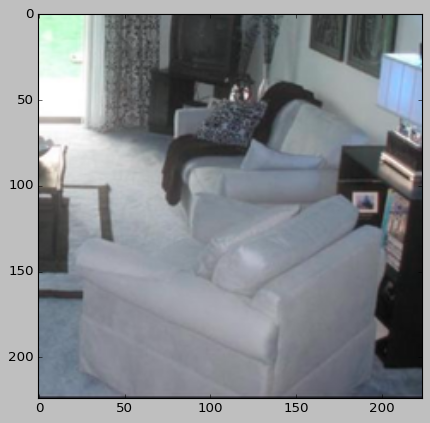

In [127]:
n = 10

prediction = model.predict(prepare(x_test[n]))
print("Probabilities: ",prediction)
x = ["Messy Room" if y_test[n]== 1 else "Clean Room"]
print("Actual: ",x[0])
rounded_prediction = model.predict_classes(x = prepare(x_test[n]), batch_size=10, verbose=0)
y = ["Messy Room" if rounded_prediction[0]== 1 else "Clean Room"]
print("Prediction: ", y[0])
plt.imshow(load_img(X_test[n]), cmap='gray')
plt.show()

Probabilities:  [[0.9932969  0.00670304]]
Actual:  Clean Room
Prediction:  Clean Room


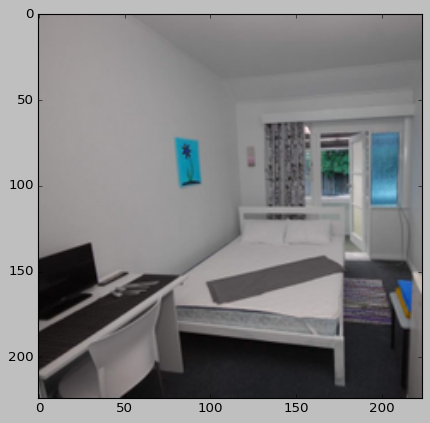

In [128]:
n = 16

prediction = model.predict(prepare(x_test[n]))
print("Probabilities: ",prediction)
x = ["Messy Room" if y_test[n]== 1 else "Clean Room"]
print("Actual: ",x[0])
rounded_prediction = model.predict_classes(x = prepare(x_test[n]), batch_size=10, verbose=0)
y = ["Messy Room" if rounded_prediction[0]== 1 else "Clean Room"]
print("Prediction: ", y[0])
plt.imshow(load_img(X_test[n]), cmap='gray')
plt.show()